# S17 T02: Base de dades MySQL

**Descripció**

Crear base de dades amb MySQL.

## Nivell 1
### - Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python




Para hacer este ejercicio he creado con la ayuda del workbench de mySQL una base de datos relacional con dos tablas, una con datos de personas y otra con los datos de puestos de trabajo.

Aquí se puede ver un esquema ER de la base de datos:

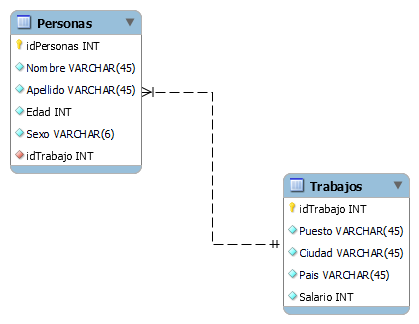



Además he introducido 30 registros en _"personas"_ y 20 registros en _"trabajos"_.

A continuación vamos a hacer una conexión con python y desde el notebook haremos una query y guardaremos su resultado en un dataframe de pandas.

Para conectarme al servidor donde tengo la base de datos SQL utilizaré la librería mysql.connector. Podéis consultar la documentación [aquí].

[aquí]: https://dev.mysql.com/doc/connector-python/en/

In [1]:
# Carga Librerías

## Data procesing
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

## MySQL conexion
import mysql.connector


El flujo de trabajo será el siguiente:

---
 

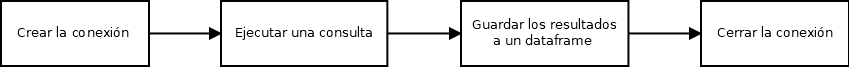

---

Los datos de mi servidor son:
 - host = localhost
 - base de datos = mydb
 - user = root
 - password = c4nionerou
 

In [2]:
# Conexión mysql

CNX = mysql.connector.connect(host = 'localhost',
                              database = 'mydb',
                              user = 'root',
                              password = 'c4nionerou',)


El método _connect_ establece la conexión con la base de datos y nos devuelve un objeto.

In [3]:
print(CNX)

In [4]:
# Instanciar el cursor

mycursor_01 = CNX.cursor()

El método _cursor_ genera un objeto MySQLCursor con el que podemos ejecutar una consulta (query). Vamos por ejemplo a seleccionar Nombre, apellidos y edad de la tabla personas.

In [5]:
# Query - Todos los nombres, apellido y edad de la tabla personas
query = '''SELECT Nombre, Apellido, Edad 
           FROM Personas'''

mycursor_01.execute(query)

Para ver los resultados de la query podemos usar diferentes métodos, fetchone, fetchmany, fetchall...

In [6]:
# Mostrar todos los resultados

mycursor_01.fetchall()

[('Antonio', 'Pérez', 30),
 ('Luisa', 'Cortes', 42),
 ('Ana', 'Fernández', 26),
 ('Eduardo', 'De la Casa', 23),
 ('Fernando', 'Martínez', 28),
 ('Francisco', 'Mandattori', 35),
 ('José', 'Fernández', 38),
 ('Adolfo', 'Jiménez', 46),
 ('Josep', 'Puig', 41),
 ('Marcos', 'Cuadros', 24),
 ('María', 'Del Señor', 37),
 ('Eloisa', 'Campanilla', 18),
 ('Clara', 'Campoamor', 50),
 ('Esther', 'Cuenca', 33),
 ('Adela', 'Mar', 36),
 ('Javier', 'Pino', 34),
 ('Antonio', 'Van der Vaar', 47),
 ('Fernando', 'Viejo', 18),
 ('Luis', 'Nuñez', 55),
 ('Felipe', 'González', 68),
 ('Aurelio', 'Buendía', 70),
 ('Jorge', 'Borgoña', 44),
 ('Ana', 'Cuesta', 26),
 ('Emma', 'Watson', 30),
 ('María', 'Abad', 34),
 ('Hugo', 'Boss', 38),
 ('Adela', 'Galletas', 32),
 ('Antonio', 'Casamayor', 34),
 ('Francisco', 'Del Campo', 35),
 ('Luisa', 'Pino', 29)]

In [7]:
# Cerramos el cursor

mycursor_01.close()

True

Vamos a crear ahora un cursor que nos extraiga el nombre de los campos. Para ello le doy el valor **True** al parámetro dictionary del nuevo cursor.

In [8]:
# Instanciar un cursor con dictionary = True

mycursor_02 = CNX.cursor(dictionary=True)

In [9]:
# Query - Selecciona Nombre, apellido y edad de todas las personas.

query = '''SELECT Nombre, Apellido, Edad 
           FROM Personas'''

mycursor_02.execute(query)

In [10]:
# Mostrar los 5 primeros resultados

mycursor_02.fetchmany(size=5)

[{'Nombre': 'Antonio', 'Apellido': 'Pérez', 'Edad': 30},
 {'Nombre': 'Luisa', 'Apellido': 'Cortes', 'Edad': 42},
 {'Nombre': 'Ana', 'Apellido': 'Fernández', 'Edad': 26},
 {'Nombre': 'Eduardo', 'Apellido': 'De la Casa', 'Edad': 23},
 {'Nombre': 'Fernando', 'Apellido': 'Martínez', 'Edad': 28}]

In [11]:
# Tenemos que extraer todas las filas antes de seguir trabajando con la misma conexión
mycursor_02.fetchall()

mycursor_02.close()

True

In [12]:
# Cierra la conexión

CNX.close()


## Nivell 2
### - Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.




In [13]:
# Conexión mysql

CNX = mysql.connector.connect(host = 'localhost',
                              database = 'mydb',
                              user = 'root',
                              password = 'c4nionerou',)


In [14]:
# Instanciar un cursor con dictionary = True

mycursor_03 = CNX.cursor(dictionary=True)

In [15]:
# Join de las tablas para obtener nombre, edad, pais y salario

query = '''SELECT P.Nombre, P.Apellido, P.Edad, T.Pais, T.Salario
            FROM Personas AS P
            INNER JOIN Trabajos AS T 
            ON P.idTrabajo = T.idTrabajo
            '''

In [16]:
# Ejecutar consulta

mycursor_03.execute(query)

In [17]:
# Extraer consulta del cursor

mycursor_03.fetchall()

[{'Nombre': 'Antonio',
  'Apellido': 'Pérez',
  'Edad': 30,
  'Pais': 'España',
  'Salario': 24000},
 {'Nombre': 'Adolfo',
  'Apellido': 'Jiménez',
  'Edad': 46,
  'Pais': 'España',
  'Salario': 24000},
 {'Nombre': 'José',
  'Apellido': 'Fernández',
  'Edad': 38,
  'Pais': 'España',
  'Salario': 28000},
 {'Nombre': 'Josep',
  'Apellido': 'Puig',
  'Edad': 41,
  'Pais': 'España',
  'Salario': 28000},
 {'Nombre': 'Luisa',
  'Apellido': 'Cortes',
  'Edad': 42,
  'Pais': 'España',
  'Salario': 30000},
 {'Nombre': 'Marcos',
  'Apellido': 'Cuadros',
  'Edad': 24,
  'Pais': 'España',
  'Salario': 30000},
 {'Nombre': 'Antonio',
  'Apellido': 'Van der Vaar',
  'Edad': 47,
  'Pais': 'España',
  'Salario': 29000},
 {'Nombre': 'María',
  'Apellido': 'Del Señor',
  'Edad': 37,
  'Pais': 'Portugal',
  'Salario': 24000},
 {'Nombre': 'Eloisa',
  'Apellido': 'Campanilla',
  'Edad': 18,
  'Pais': 'España',
  'Salario': 25000},
 {'Nombre': 'Fernando',
  'Apellido': 'Viejo',
  'Edad': 18,
  'Pais': 'Españ

Podríamos cargar varias querys y ver los resultados.

In [18]:
# Query 1 - Personas mayores de 30 años

mayores_30 = '''SELECT Nombre, Apellido
                FROM Personas
                WHERE Edad >= 30
                '''

# Query 2 - Número de Personas mayores de 30 años

total_mayores_30 = '''SELECT COUNT(*) AS Mayores_de_30
                      FROM Personas
                      WHERE Edad >= 30
                      '''

# Salario medio por país

Salario_medio_pais =  '''SELECT Pais, AVG(Salario) AS Salario_Medio  
                        FROM Trabajos
                        GROUP BY Pais
                        ORDER BY Salario_Medio DESC
                        '''




In [19]:
# Personas mayores de 30 años

mycursor_03.execute(mayores_30)

In [20]:
mycursor_03.fetchall()

[{'Nombre': 'Antonio', 'Apellido': 'Pérez'},
 {'Nombre': 'Luisa', 'Apellido': 'Cortes'},
 {'Nombre': 'Francisco', 'Apellido': 'Mandattori'},
 {'Nombre': 'José', 'Apellido': 'Fernández'},
 {'Nombre': 'Adolfo', 'Apellido': 'Jiménez'},
 {'Nombre': 'Josep', 'Apellido': 'Puig'},
 {'Nombre': 'María', 'Apellido': 'Del Señor'},
 {'Nombre': 'Clara', 'Apellido': 'Campoamor'},
 {'Nombre': 'Esther', 'Apellido': 'Cuenca'},
 {'Nombre': 'Adela', 'Apellido': 'Mar'},
 {'Nombre': 'Javier', 'Apellido': 'Pino'},
 {'Nombre': 'Antonio', 'Apellido': 'Van der Vaar'},
 {'Nombre': 'Luis', 'Apellido': 'Nuñez'},
 {'Nombre': 'Felipe', 'Apellido': 'González'},
 {'Nombre': 'Aurelio', 'Apellido': 'Buendía'},
 {'Nombre': 'Jorge', 'Apellido': 'Borgoña'},
 {'Nombre': 'Emma', 'Apellido': 'Watson'},
 {'Nombre': 'María', 'Apellido': 'Abad'},
 {'Nombre': 'Hugo', 'Apellido': 'Boss'},
 {'Nombre': 'Adela', 'Apellido': 'Galletas'},
 {'Nombre': 'Antonio', 'Apellido': 'Casamayor'},
 {'Nombre': 'Francisco', 'Apellido': 'Del Campo'

In [21]:
# Total de personas mayores

mycursor_03.execute(total_mayores_30)

In [22]:
mycursor_03.fetchall()

[{'Mayores_de_30': 22}]

In [23]:
# Salario medio por país

mycursor_03.execute(Salario_medio_pais)
mycursor_03.fetchall()

[{'Pais': 'Francia', 'Salario_Medio': Decimal('33250.0000')},
 {'Pais': 'Portugal', 'Salario_Medio': Decimal('28000.0000')},
 {'Pais': 'España', 'Salario_Medio': Decimal('26227.2727')},
 {'Pais': 'Escaña', 'Salario_Medio': Decimal('24000.0000')}]

Ups, hay una errata en los nombres de los países, alguien escribió Escaña en Vesde España, vamos a corregirlo con una sentencia UPDATE.

In [24]:
# Update para corregir valor Pais erróneo

correcion = '''UPDATE Trabajos
               SET Pais = 'España'
               WHERE Pais = 'Escaña'
               '''

In [25]:
mycursor_03.execute(correcion)
mycursor_03.fetchall()

[]

In [26]:
# Vuelvo a ejecutar la consulta de salario medio por pais

mycursor_03.execute(Salario_medio_pais)
mycursor_03.fetchall()

[{'Pais': 'Francia', 'Salario_Medio': Decimal('33250.0000')},
 {'Pais': 'Portugal', 'Salario_Medio': Decimal('28000.0000')},
 {'Pais': 'España', 'Salario_Medio': Decimal('26041.6667')}]

Voy a probar a ejecutar una sub-query para encountrar el salario medio de trabajadores mayores de 30 por país.

In [27]:
# Salario medio de los mayores de 30 por país

Salario_medio_30 =  '''SELECT Pais, AVG(Salario) AS Salario_Medio_30 
                        FROM Trabajos
                        WHERE idTrabajo IN (SELECT idTrabajo
                                               FROM Personas
                                               WHERE Edad >= 30)
                        GROUP BY Pais
                        ORDER BY Salario_Medio_30 DESC
                        '''

In [28]:
mycursor_03.execute(Salario_medio_30)
mycursor_03.fetchall()

[{'Pais': 'Francia', 'Salario_Medio_30': Decimal('31333.3333')},
 {'Pais': 'Portugal', 'Salario_Medio_30': Decimal('28000.0000')},
 {'Pais': 'España', 'Salario_Medio_30': Decimal('25550.0000')}]

Para terminar el ejercicio, voy a generar una consulta que me devuelva una tabla con IdPersona, Sexo, Edad, Puesto y País y lo guardaré en un dataframe llamado datos_empleo.

In [29]:
query_empleos = '''SELECT P.idPersonas, P.Sexo, P.Edad,T.Puesto, T.Pais, T.Salario
                    FROM Personas AS P
                    INNER JOIN Trabajos AS T 
                    ON P.idTrabajo = T.idTrabajo
                '''

In [30]:
# Instancio la consulta
mycursor_03.execute(query_empleos)

# Asigno resultado a una variable
resultado = mycursor_03.fetchall()

# Guardo en un dataframe
datos_empleo = pd.DataFrame(resultado)
datos_empleo

,idPersonas,Sexo,Edad,Puesto,Pais,Salario
0,1,Hombre,30,Profesor,España,24000
1,8,Hombre,46,Profesor,España,24000
2,7,Hombre,38,Profesor,España,28000
3,9,Hombre,41,Profesor,España,28000
4,2,Mujer,42,Médico,España,30000
5,10,Hombre,24,Médico,España,30000
6,17,Hombre,47,Médico,España,29000
7,11,Mujer,37,Enfermero,Portugal,24000
8,12,Mujer,18,Enfermero,España,25000
9,18,Hombre,18,Enfermero,España,25000


In [31]:
# Cierro cursor
mycursor_03.close()

# Cierro conexión
CNX.close()

## Nivell 3
### - Exercici 3

Genera algun gràfic que resumeixi les dades. 




Veamos ahora algunas representaciones gráficas de este dataframe.

In [32]:
datos_empleo.head()

,idPersonas,Sexo,Edad,Puesto,Pais,Salario
0,1,Hombre,30,Profesor,España,24000
1,8,Hombre,46,Profesor,España,24000
2,7,Hombre,38,Profesor,España,28000
3,9,Hombre,41,Profesor,España,28000
4,2,Mujer,42,Médico,España,30000


Por ejemplo podemos analizar la diferencia de salarios entre hombre y mujeres por país.

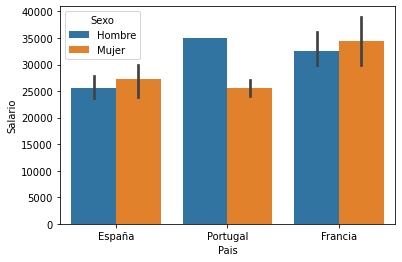

In [33]:
# Salario medio por pais y sexo

sns.barplot(data = datos_empleo,
            x = 'Pais',
            y = 'Salario',
            hue = 'Sexo');

O un gráfico de dispersión Edad - Salario.

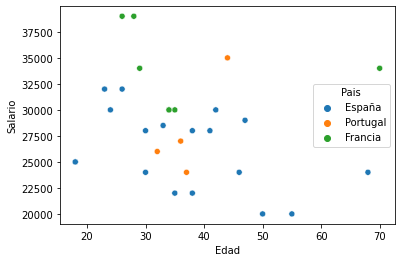

In [34]:
# Edad vs Salario y pais

sns.scatterplot(data = datos_empleo,
                x = 'Edad',
                y = 'Salario',
                hue = 'Pais');

O como son remuneradas las direntes profesiones por país.  

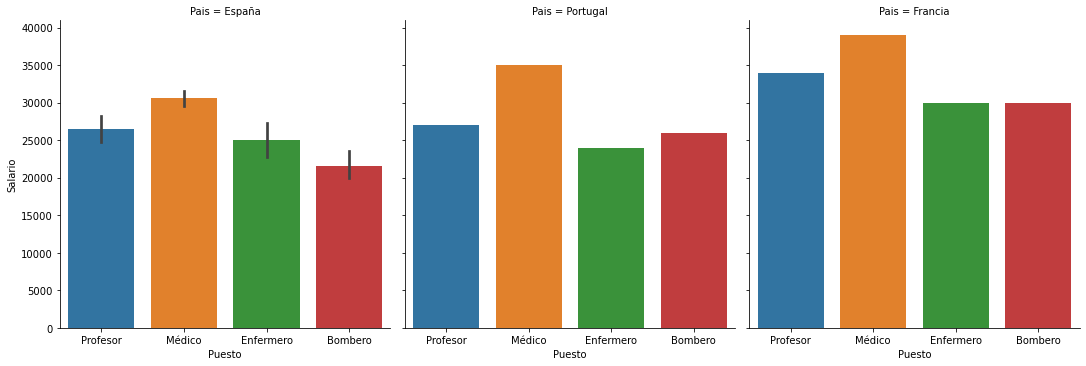

In [35]:
# Salario vs Puesto

sns.catplot(data = datos_empleo,
            kind = 'bar',
            x = 'Puesto',
            y = 'Salario',
            col = 'Pais',
            col_wrap = 3);

Tan solo recordar que estos datos han sido creados para este ejercicio y no reflejan para nada la realidad. 